# Advanced Lane Detection

## Camera Calibration

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find Corner

In [9]:
def find_corner(file_path, nx=9, ny=6, visualize = False):
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True and visualize == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        
    return ret, corners

In [21]:
import glob
import os

def generate_calibration_data(directory_path):
    nx = 9
    ny = 6
    objp = np.zeros((ny*nx,3), np.float32)
    
    paths = os.path.join(directory_path, 'calibration*.jpg')
    images = glob.glob(paths)
    del images[0]
    objpoints = list()
    imgpoints = list()
    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        ret, corners = find_corner(fname)
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
    return objpoints, imgpoints

In [22]:
objpoints, imgpoints = generate_calibration_data(os.path.join(os.getcwd(), 'camera_cal'))
print('num of reference img {}'.format(len(objpoints)))
print('num of reference img {}'.format(len(imgpoints)))

num of reference img 17
num of reference img 17


### Undistorted

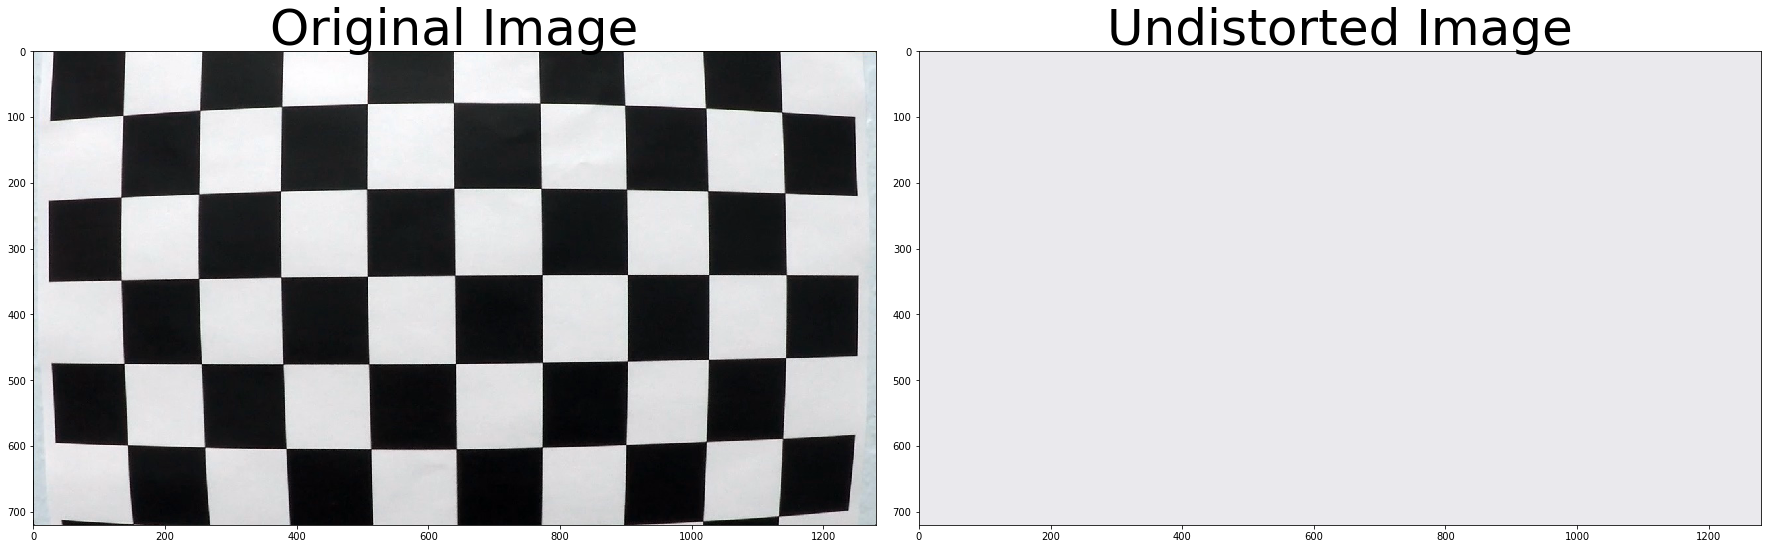

In [24]:
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

img = cv2.imread(os.path.join(os.getcwd(), 'camera_cal', 'calibration1.jpg'))
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Thresholding and Binary Image

## Perspective Transformation

## Detect Lane Pixel

## Determine Curvature

## Warp Back to Original Image